In [1]:
import numpy as np

class Bandit:
    def __init__(self,arms=10):
        self.probs = np.random.rand(arms)
    
    def play(self, arm):
        prob = self.probs[arm]
        random_numb = np.random.rand()
        if random_numb < prob:
            return 1
        else:
            return 0



In [15]:
class Agent:
    def __init__(self,numb_actions=10, espsilon=0.1):
        self.numb_actions = numb_actions
        self.epsilon = espsilon
        self.action_chosen_times = np.zeros(numb_actions)
        self.action_values = np.zeros(numb_actions)
    
    def update_action_value(self, chosen_action, reward):
        self.action_chosen_times[chosen_action] += 1
        self.action_values[chosen_action] += (reward - self.action_values[chosen_action]) / self.action_chosen_times[chosen_action]
    
    def choose_action(self):
        if np.random.rand() < self.epsilon:
            # explore other actions once in a while
            return np.random.randint(0, self.numb_actions)
        # exploit the action with highest estimated value
        return np.argmax(self.action_values)


In [31]:
# play the game
from tqdm import tqdm

numb_actions = 10
epsilon = 0.1
numb_rounds = 1000
environment = Bandit(numb_actions)
agent = Agent(numb_actions, epsilon)

total_reward = 0
total_rewards = []
average_rewards = []

for step in tqdm(range(numb_rounds)):
    chosen_action = agent.choose_action()
    reward = environment.play(chosen_action)
    agent.update_action_value(chosen_action, reward)
    total_reward += reward
    total_rewards.append(total_reward)
    average_rewards.append(total_reward/(step+1))


100%|██████████| 1000/1000 [00:00<00:00, 81431.73it/s]


In [32]:
best_machines=np.argsort(environment.probs)[::-1]
best_machine_probs = np.sort(environment.probs)[::-1]
print(f"best machines :\n{best_machines}")
print(f"best machine probs:\n{np.round(best_machine_probs,2)}")

best machines :
[9 5 8 1 6 2 4 0 7 3]
best machine probs:
[0.8  0.65 0.64 0.62 0.53 0.36 0.32 0.31 0.19 0.11]


In [33]:
for best_machine, prob in zip(best_machines,best_machine_probs):
    print(f"machine : {best_machine}, its prob: {prob}, how many times it was picked : {agent.action_chosen_times[best_machine]}")

machine : 9, its prob: 0.7995068795476733, how many times it was picked : 811.0
machine : 5, its prob: 0.6543435207246486, how many times it was picked : 24.0
machine : 8, its prob: 0.6398835563103353, how many times it was picked : 33.0
machine : 1, its prob: 0.6191012327417843, how many times it was picked : 12.0
machine : 6, its prob: 0.5290976624229939, how many times it was picked : 11.0
machine : 2, its prob: 0.36279940742813543, how many times it was picked : 8.0
machine : 4, its prob: 0.3203254852966564, how many times it was picked : 17.0
machine : 0, its prob: 0.3125269560570064, how many times it was picked : 64.0
machine : 7, its prob: 0.18807368478032804, how many times it was picked : 10.0
machine : 3, its prob: 0.11023516552517265, how many times it was picked : 10.0


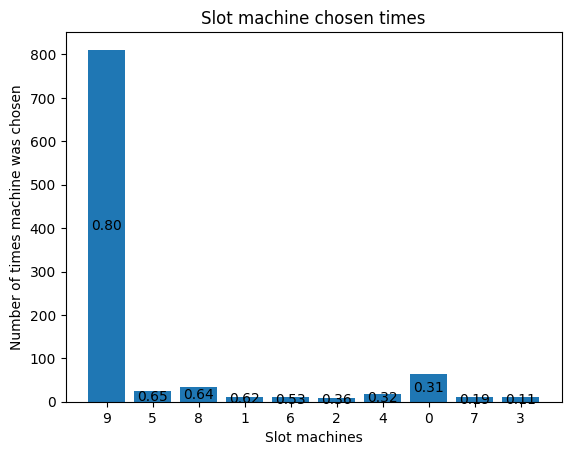

In [34]:
import matplotlib.pyplot as plt
best_machine_chosen_times=[agent.action_chosen_times[m] for m in best_machines]
best_machine_labels = [str(m) for m in best_machines]

fig,ax=plt.subplots()

ax.bar(best_machine_labels,best_machine_chosen_times)

for i,prob in enumerate(best_machine_probs):
    ax.text(i,best_machine_chosen_times[i]/2,f"{prob:.2f}",ha="center",va="center")

ax.set_xlabel("Slot machines")
ax.set_ylabel("Number of times machine was chosen")
ax.set_title("Slot machine chosen times")
plt.show()

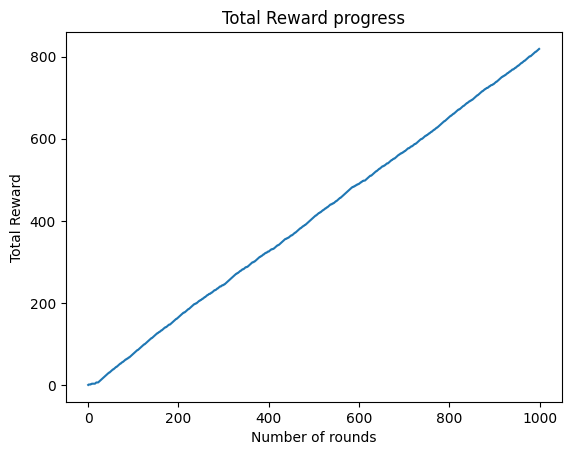

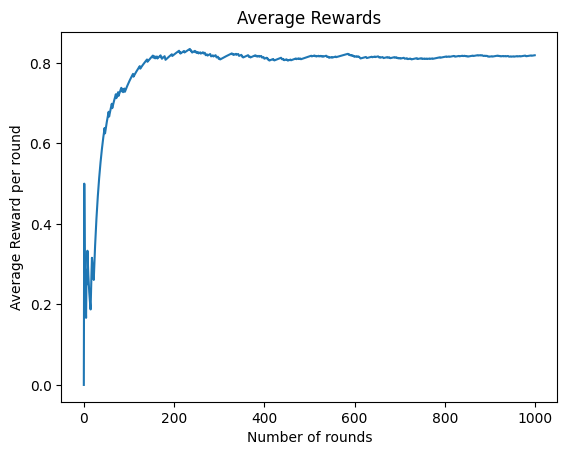

In [20]:

plt.figure()
plt.title("Total Reward progress")
plt.xlabel("Number of rounds")
plt.ylabel("Total Reward")
plt.plot(total_rewards)
plt.show()

plt.figure()
plt.title("Average Rewards")
plt.xlabel("Number of rounds")
plt.ylabel("Average Reward per round")
plt.plot(average_rewards)
plt.show()